## [教學目標]
學習使用 sklearn 中的 train_test_split 等套件，進行資料的切分

## [範例重點]
了解函數中各個參數的意義

In [1]:
### 台大電機李宏毅教授講解訊練/驗證/測試集的意義

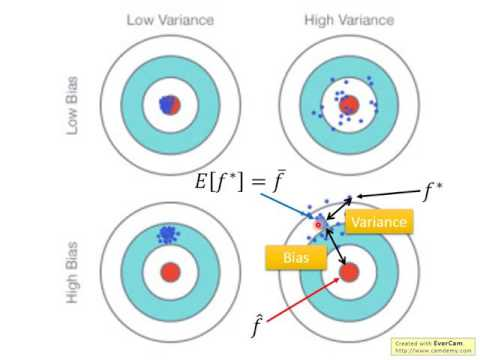

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("D_S6y0Jm6dQ", width=720, height=480)

## 引入我們需要的套件

In [3]:
from sklearn.model_selection import train_test_split, KFold
import numpy as np

## 用 numpy 生成隨機資料

In [4]:
X = np.arange(50).reshape(10, 5) # 生成從 0 到 50 的 array，並 reshape 成 (10, 5) 的 matrix
y = np.zeros(10) # 生成一個全零 arrary
y[:5] = 1 # 將一半的值改為 1
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (10, 5)
Shape of y:  (10,)


In [5]:
print('X: shape: ' + str(X.shape))
print(X)
print("")
print('y: shape: ' + str(y.shape))
print(y)

X: shape: (10, 5)
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]
 [45 46 47 48 49]]

y: shape: (10,)
[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


## 使用 train_test_split 函數進行切分
請參考 train_test_split 函數的[說明](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)，了解函數裡的參數意義
- test_size 一定只能小於 1 嗎？
> If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.
- random_state 不設置會怎麼樣呢？
> random_state代表the random number generator, 不設定會用np.random產生一個值帶入

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
X_test

array([[40, 41, 42, 43, 44],
       [ 5,  6,  7,  8,  9],
       [25, 26, 27, 28, 29],
       [ 0,  1,  2,  3,  4]])

In [8]:
X_train

array([[35, 36, 37, 38, 39],
       [10, 11, 12, 13, 14],
       [45, 46, 47, 48, 49],
       [20, 21, 22, 23, 24],
       [15, 16, 17, 18, 19],
       [30, 31, 32, 33, 34]])

In [9]:
y_train

array([0., 1., 0., 1., 1., 0.])

## 使用 K-fold Cross-validation 來切分資料
請參考 kf 函數的[說明](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)，了解參數中的意義。K 可根據資料大小自行決定，K=5 是蠻常用的大小
- 如果使用 shuffle=True 會怎麼樣?
> shuffle=False(預設)會按照順序做分割，shuffle=True會洗牌

In [10]:
kf = KFold(n_splits=5,  shuffle=True)
i = 0
for train_index, test_index in kf.split(X):
    i +=1 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("FOLD {}: ".format(i))
    print("X_test: ", X_test)
    print("Y_test: ", y_test)
    print("-"*30)

FOLD 1: 
X_test:  [[ 0  1  2  3  4]
 [20 21 22 23 24]]
Y_test:  [1. 1.]
------------------------------
FOLD 2: 
X_test:  [[ 5  6  7  8  9]
 [25 26 27 28 29]]
Y_test:  [1. 0.]
------------------------------
FOLD 3: 
X_test:  [[30 31 32 33 34]
 [35 36 37 38 39]]
Y_test:  [0. 0.]
------------------------------
FOLD 4: 
X_test:  [[10 11 12 13 14]
 [15 16 17 18 19]]
Y_test:  [1. 1.]
------------------------------
FOLD 5: 
X_test:  [[40 41 42 43 44]
 [45 46 47 48 49]]
Y_test:  [0. 0.]
------------------------------


## [作業重點]
觀察函數說明，要如何切出固定大小的測試集?

## 作業
假設我們資料中類別的數量並不均衡，在評估準確率時可能會有所偏頗，試著切分出 y_test 中，0 類別與 1 類別的數量是一樣的 (亦即 y_test 的類別是均衡的)

In [11]:
X = np.arange(1000).reshape(200, 5)
y = np.zeros(200)
y[:40] = 1

In [12]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

可以看見 y 類別中，有 160 個 類別 0，40 個 類別 1 ，請試著使用 train_test_split 函數，切分出 y_test 中能各有 10 筆類別 0 與 10 筆類別 1 。(HINT: 參考函數中的 test_size，可針對不同類別各自作切分後再合併)

In [13]:
np.where(y==1)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int64)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_1_index, y_0_index = np.where(y==1)[0], np.where(y==0)[0] # 選出 y 等於 1 的 index 與 y 等於 0 的 index
y_1_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int64)

In [15]:
X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X[y_0_index], y[y_0_index], test_size=10)
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X[y_1_index], y[y_1_index], test_size=10, random_state=2)
print(y_0_test)
print(y_1_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
x_train, y_train = np.concatenate([X_0_train, X_1_train]), np.concatenate([y_0_train, y_1_train])
x_test, y_test = np.concatenate([X_0_test, X_1_test]), np.concatenate([y_0_test, y_1_test])
print(y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**训练数据集（Training Set)**: 是一些我们已经知道输入和输出的数据集训练机器去学习，通过拟合去寻找模型的初始参数。例如在神经网络（Neural Networks)中， 我们用训练数据集和反向传播算法（Backpropagation）去每个神经元找到最优的比重（Weights)。

**验证数据集（Validation Set）**：也是一些我们已经知道输入和输出的数据集，通过让机器学习去优化调整模型的参数，在神经网络中， 我们用验证数据集去寻找最优的网络深度（number of hidden layers)，或者决定反向传播算法的停止点；在普通的机器学习中常用的交叉验证（Cross Validation) 就是把训练数据集本身再细分成不同的验证数据集去训练模型。

**测试数据集（Test Set）**：用户测试模型表现的数据集，根据误差（一般为预测输出与实际输出的不同）来判断一个模型的好坏。

为什么验证数据集和测试数据集两者都需要？

因为验证数据集（Validation Set)用来调整模型参数从而选择最优模型，模型本身已经同时知道了输入和输出，所以从验证数据集上得出的误差（Error)会有偏差（Bias)。

但是我们只用测试数据集(Test Set) 去评估模型的表现，并不会去调整优化模型。

在传统的机器学习中，这三者一般的比例为training/validation/test = 50/25/25, 但是有些时候如果模型不需要很多调整只要拟合就可时，或者training本身就是training+validation (比如cross validation)时，也可以training/test =7/3.



但是在深度学习中，由于数据量本身很大，而且训练神经网络需要的数据很多，可以把更多的数据分给training，而相应减少validation和test

